___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways. Also, you will calibrate your model outputs.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

After the ML Deployment Course, you will able to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines. It has **550,000** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for small amount of all transactions.

**Feature Information:**

- **id:** Unique identifier for each transaction
- **V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount:** The transaction amount
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will prapare your model for deployment.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity
from deepchecks.tabular.suites import train_test_validation
from deepchecks.tabular.suites import model_evaluation

from sklearn.ensemble import IsolationForest
from kneed import KneeLocator

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score, precision_recall_curve
from sklearn.metrics import make_scorer, f1_score, brier_score_loss

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import shap

from sklearn.calibration import CalibrationDisplay, calibration_curve, CalibratedClassifierCV

In [279]:
df = pd.read_csv('creditcard.csv')

In [281]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [283]:
df.shape

(284807, 31)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [289]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [16]:
ds = Dataset(df, label= 'Class')

suite = data_integrity()
result = suite.run(ds)
result.show()

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_2RT67BUOE8GAQC5D5M7A84WSO">Data Integrity Sui…

### Exploratory Data Analysis

In [19]:
df.isnull().sum().max()

0

In [20]:
df.duplicated().sum()

1081

In [291]:
df.drop_duplicates(inplace=True)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [22]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

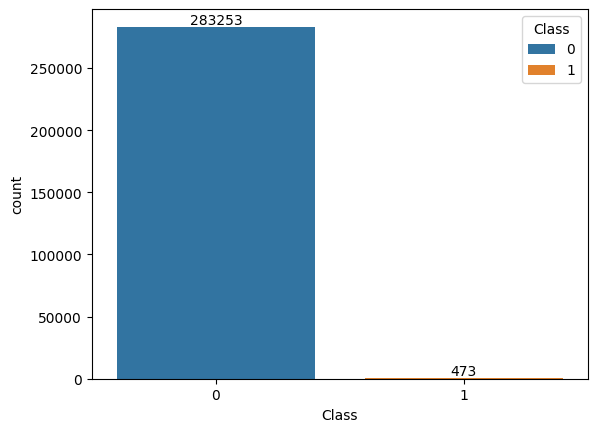

In [293]:
ax = sns.countplot(data=df, x='Class', hue='Class')
for container in ax.containers:
    plt.bar_label(container);

### Data Cleaning
Check Missing Values and Outliers

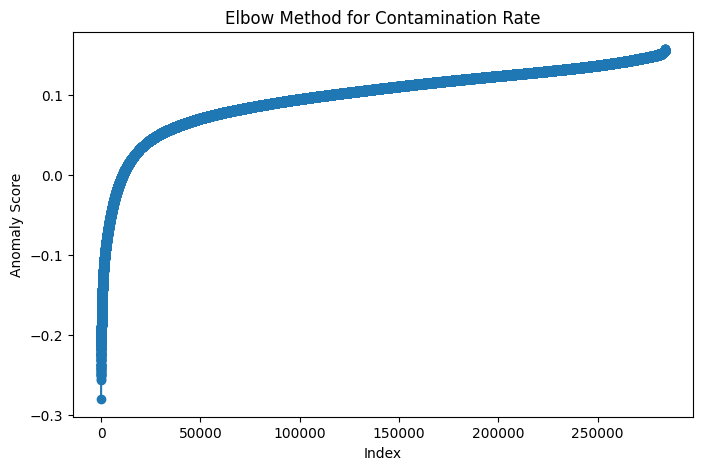

In [295]:
iso_forest = IsolationForest(n_estimators=100, random_state=42)
iso_forest.fit(df)

scores = iso_forest.decision_function(df)

sorted_scores = np.sort(scores)

plt.figure(figsize=(8, 5))
plt.plot(range(len(sorted_scores)), sorted_scores, marker='o', linestyle='-')
plt.xlabel("Index")
plt.ylabel("Anomaly Score")
plt.title("Elbow Method for Contamination Rate")
plt.show()

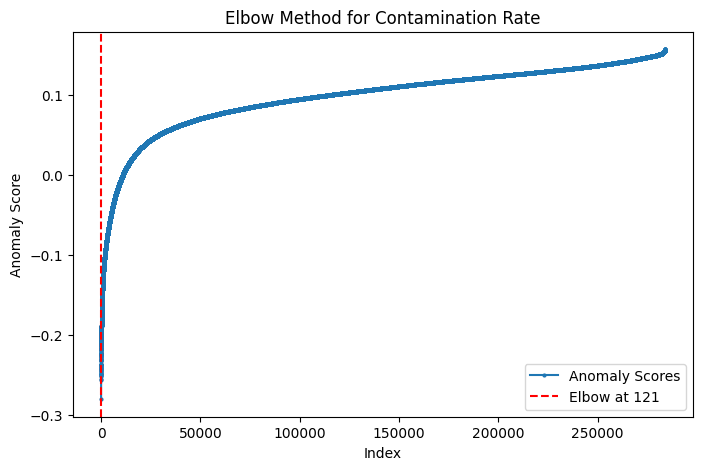

Suggested Contamination Rate: 0.0004


0.0004264677893460592

In [26]:
def find_elbow_point(anomaly_scores):
    """
    Finds the elbow point in anomaly scores using the KneeLocator method.
    """
    sorted_scores = np.sort(anomaly_scores)
    index = np.arange(len(sorted_scores))

    kneedle = KneeLocator(index, sorted_scores, curve="concave", direction="increasing")

    elbow_index = kneedle.knee

    plt.figure(figsize=(8, 5))
    plt.plot(index, sorted_scores, label="Anomaly Scores", marker="o", markersize=2)
    plt.axvline(x=elbow_index, color="r", linestyle="--", label=f"Elbow at {elbow_index}")
    plt.xlabel("Index")
    plt.ylabel("Anomaly Score")
    plt.title("Elbow Method for Contamination Rate")
    plt.legend()
    plt.show()

    contamination_rate = elbow_index / len(anomaly_scores)
    print(f"Suggested Contamination Rate: {contamination_rate:.4f}")

    return contamination_rate

find_elbow_point(scores)

In [27]:
df.shape[0] * 0.0004

113.49040000000001

In [297]:
df2 = df.copy()

In [299]:
iso_forest = IsolationForest(contamination=0.0004, random_state=42)
df2['outlier'] = iso_forest.fit_predict(df)

df2[df2.outlier == -1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,outlier
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,-2.636622,3.702177,-1.843056,2.427123,-1.652836,3.635042,4.087802,-1.654892,-0.888406,0.752276,-11.748689,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0,-1
6812,8592.0,-23.066842,-25.640527,-3.080313,4.866932,6.901397,-4.074335,2.027345,-2.688652,3.402966,2.881873,3.236837,-2.889369,4.465413,-1.550096,1.928388,3.930881,-1.352591,-0.988008,2.693421,-13.276034,-5.378106,3.312971,13.876221,-0.572177,5.525093,0.906980,3.358822,3.553906,845.73,0,-1
8610,11621.0,-27.670569,-34.607649,2.243079,10.463020,34.099309,-23.496714,-26.548144,-0.779134,7.496577,6.605512,1.289795,0.408602,2.805178,0.730664,2.842023,-0.053785,1.308949,-1.923459,4.555359,-12.834042,-4.651023,-1.627883,-11.669994,2.192626,-2.483069,1.788189,8.254376,-3.509250,55.25,0,-1
10690,18088.0,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,9.328799,-13.104933,0.888481,-10.140200,0.713465,-10.098671,-17.506612,-8.061208,1.606870,-2.147181,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1,-1
15781,27219.0,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,4.783257,-6.699252,0.846768,-6.576276,-0.062330,-5.961660,-12.218482,-4.791842,0.894854,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262843,160672.0,-34.092032,-24.237418,-15.758012,12.672760,-14.913249,7.939152,11.118494,-1.985873,5.693151,6.601719,0.690859,0.868797,2.803243,-2.158797,2.838230,5.286804,-0.566628,-0.572758,2.772667,-14.562079,-6.406856,-1.384773,-13.615143,1.542827,-0.332634,-0.058112,-6.782493,14.974180,1441.06,0,-1
265657,161985.0,-24.717179,-29.700604,-2.017586,7.015138,15.700555,-10.819584,-3.586669,-1.336900,3.279434,1.437047,-0.626104,-0.005154,1.211044,-1.657643,1.605334,1.356467,-1.484121,-0.056169,3.477968,-11.753658,-4.410023,3.820005,22.083545,-0.098109,6.070850,1.461475,6.578849,-4.398798,35.95,0,-1
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0,-1
279610,168987.0,-25.672101,-30.913347,-2.943712,5.330375,11.886791,-8.036176,-1.273707,-1.444300,2.047691,1.271063,-0.630691,-0.755941,1.965513,-2.259398,1.194688,3.806672,-1.539355,-1.588081,2.841875,-11.312828,-4.777701,2.097348,20.803344,0.290511,5.826159,0.578662,6.987314,-3.666456,998.19,0,-1


In [301]:
df.drop(df2[df2.outlier == -1].index, axis=0, inplace=True)

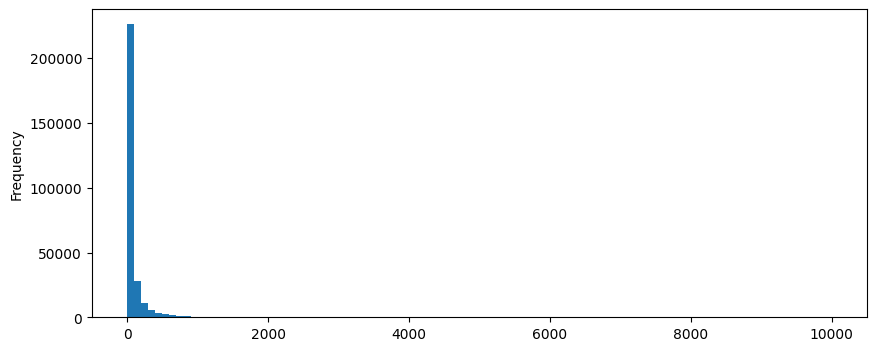

In [303]:
df.Amount.plot.hist(bins=100, figsize=(10,4));

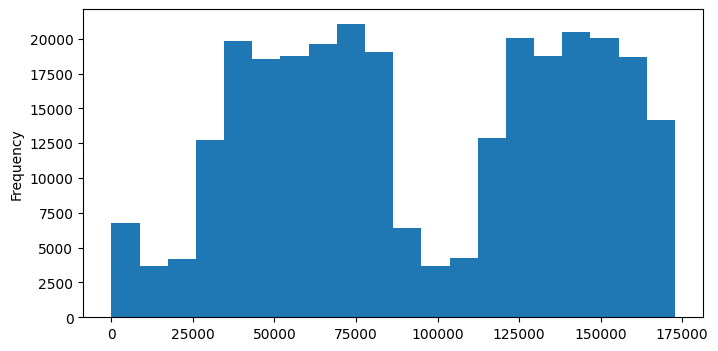

In [305]:
df.Time.plot.hist(bins=20, figsize=(8,4));

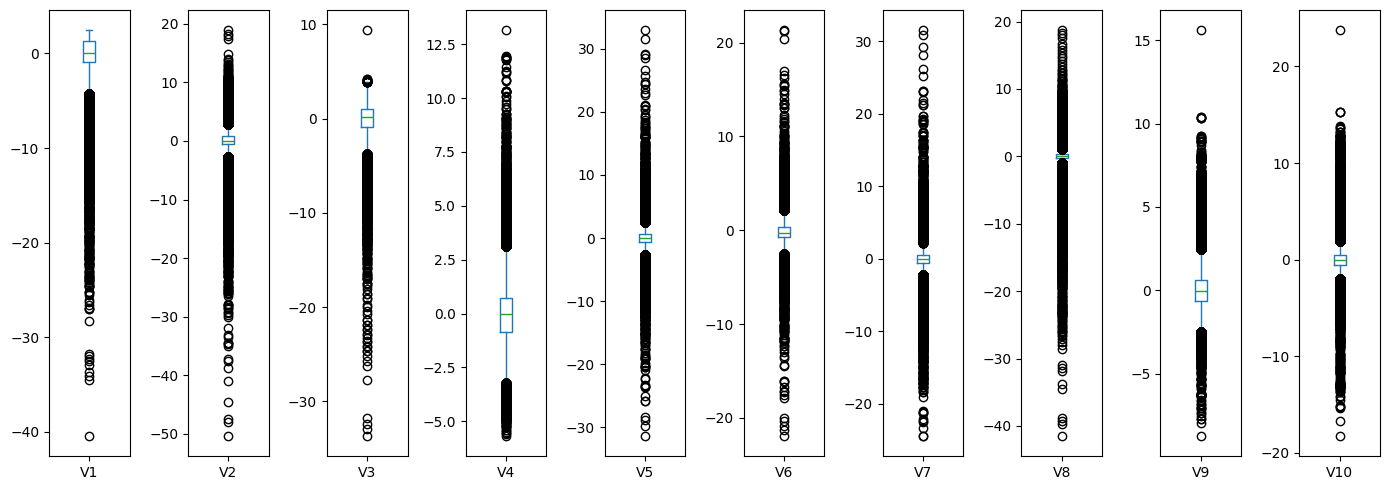

In [34]:
df.iloc[:, 1:11].plot(kind='box', subplots=True, figsize=(14, 5))
plt.tight_layout()
plt.show()

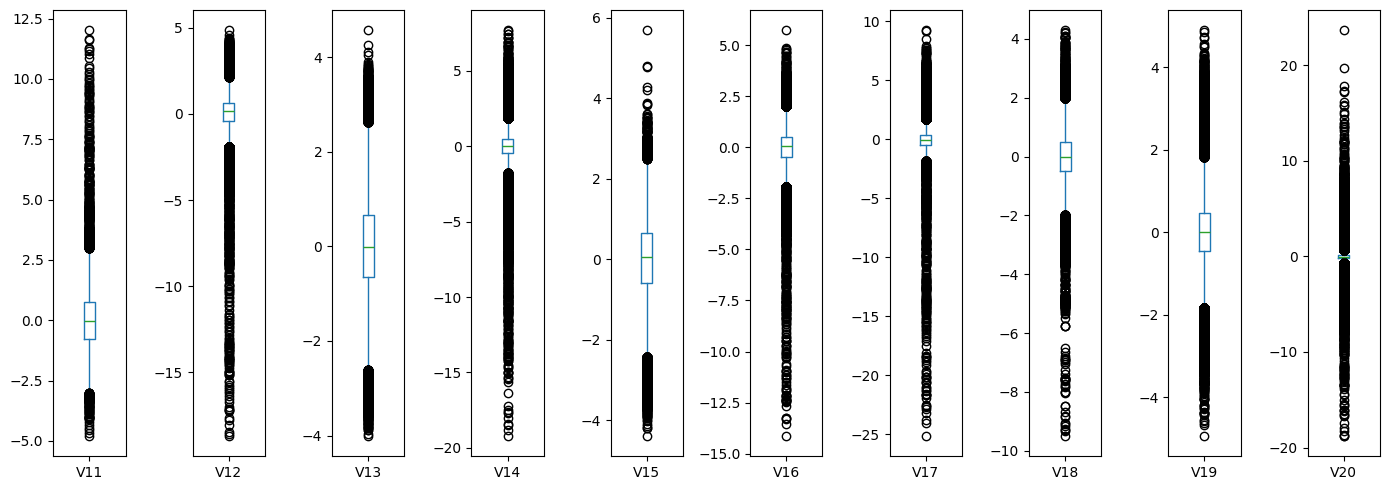

In [35]:
df.iloc[:, 11:21].plot(kind='box', subplots=True, figsize=(14, 5))
plt.tight_layout()
plt.show()

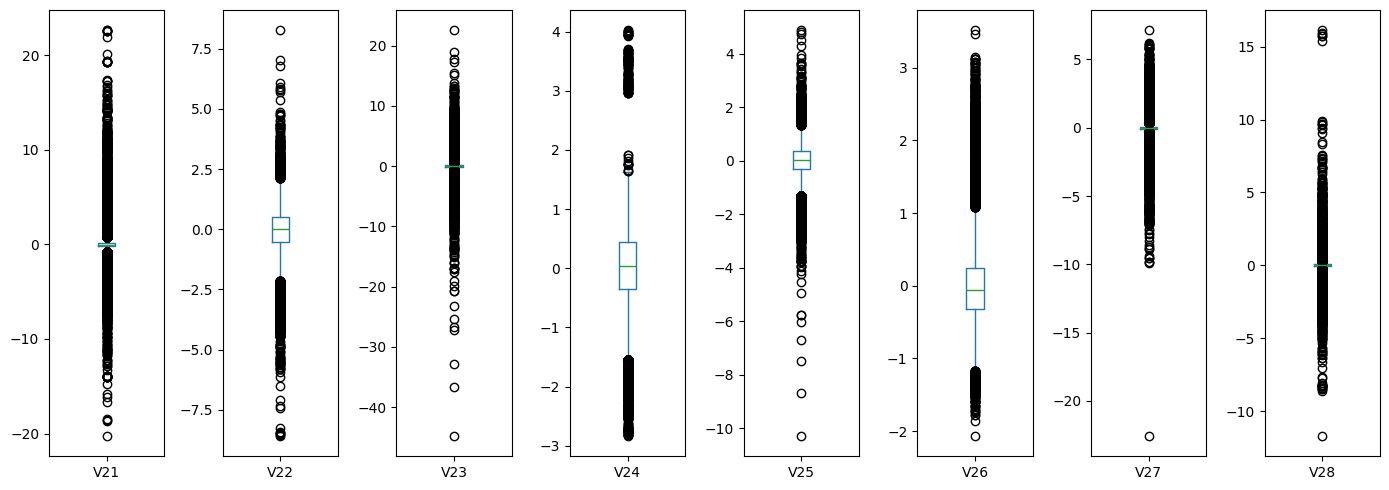

In [36]:
df.iloc[:, 21:29].plot(kind='box', subplots=True, figsize=(14, 5))
plt.tight_layout()
plt.show()

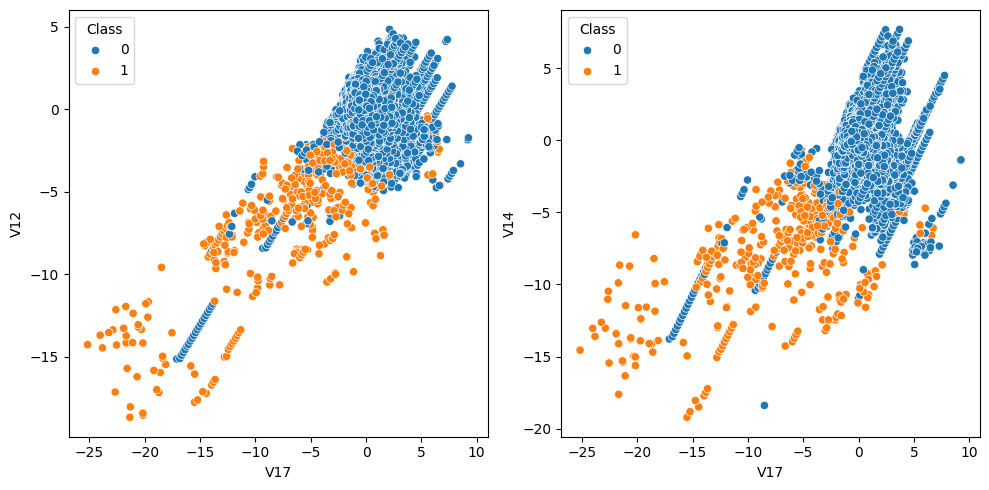

In [309]:
#Features with high PPS

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.scatterplot(data=df, x='V17', y='V12', hue='Class')
plt.subplot(122)
sns.scatterplot(data=df, x='V17', y='V14', hue='Class')
plt.tight_layout()
plt.show()

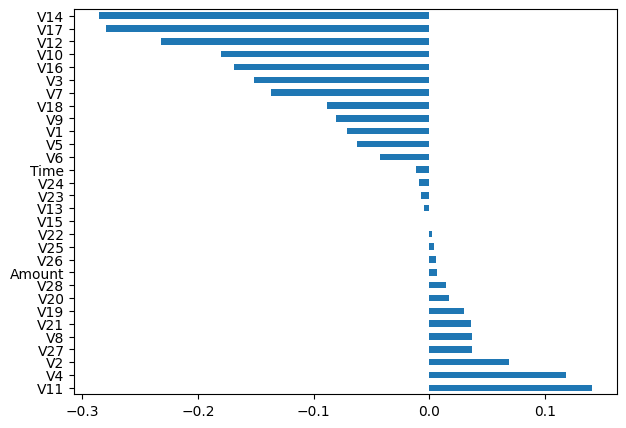

In [38]:
df.corr().iloc[:-1, :].Class.sort_values(ascending=False).plot(kind='barh', figsize=(7,5));

---
---


## 2. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.

In [311]:
columns = ['V17', 'V12', 'V14', 'V10', 'V16', 'V11', 'V4', 'Class']

In [313]:
df_selection = df[columns]
df_selection.head()

,V17,V12,V14,V10,V16,V11,V4,Class
0,0.207971,-0.617801,-0.311169,0.090794,-0.470401,-0.551600,1.378155,0
1,-0.114805,1.065235,-0.143772,-0.166974,0.463917,1.612727,0.448154,0
2,1.109969,0.066084,-0.165946,0.207643,-2.890083,0.624501,0.379780,0
3,-0.684093,0.178228,-0.287924,-0.054952,-1.059647,-0.226487,-0.863291,0
4,-0.237033,0.538196,-1.119670,0.753074,-0.451449,-0.822843,0.403034,0


In [315]:
target_size = 10_000
df_sampled = df_selection.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=target_size / len(df_selection)))

df_sampled.Class.value_counts()

Class
0    9984
1      16
Name: count, dtype: int64

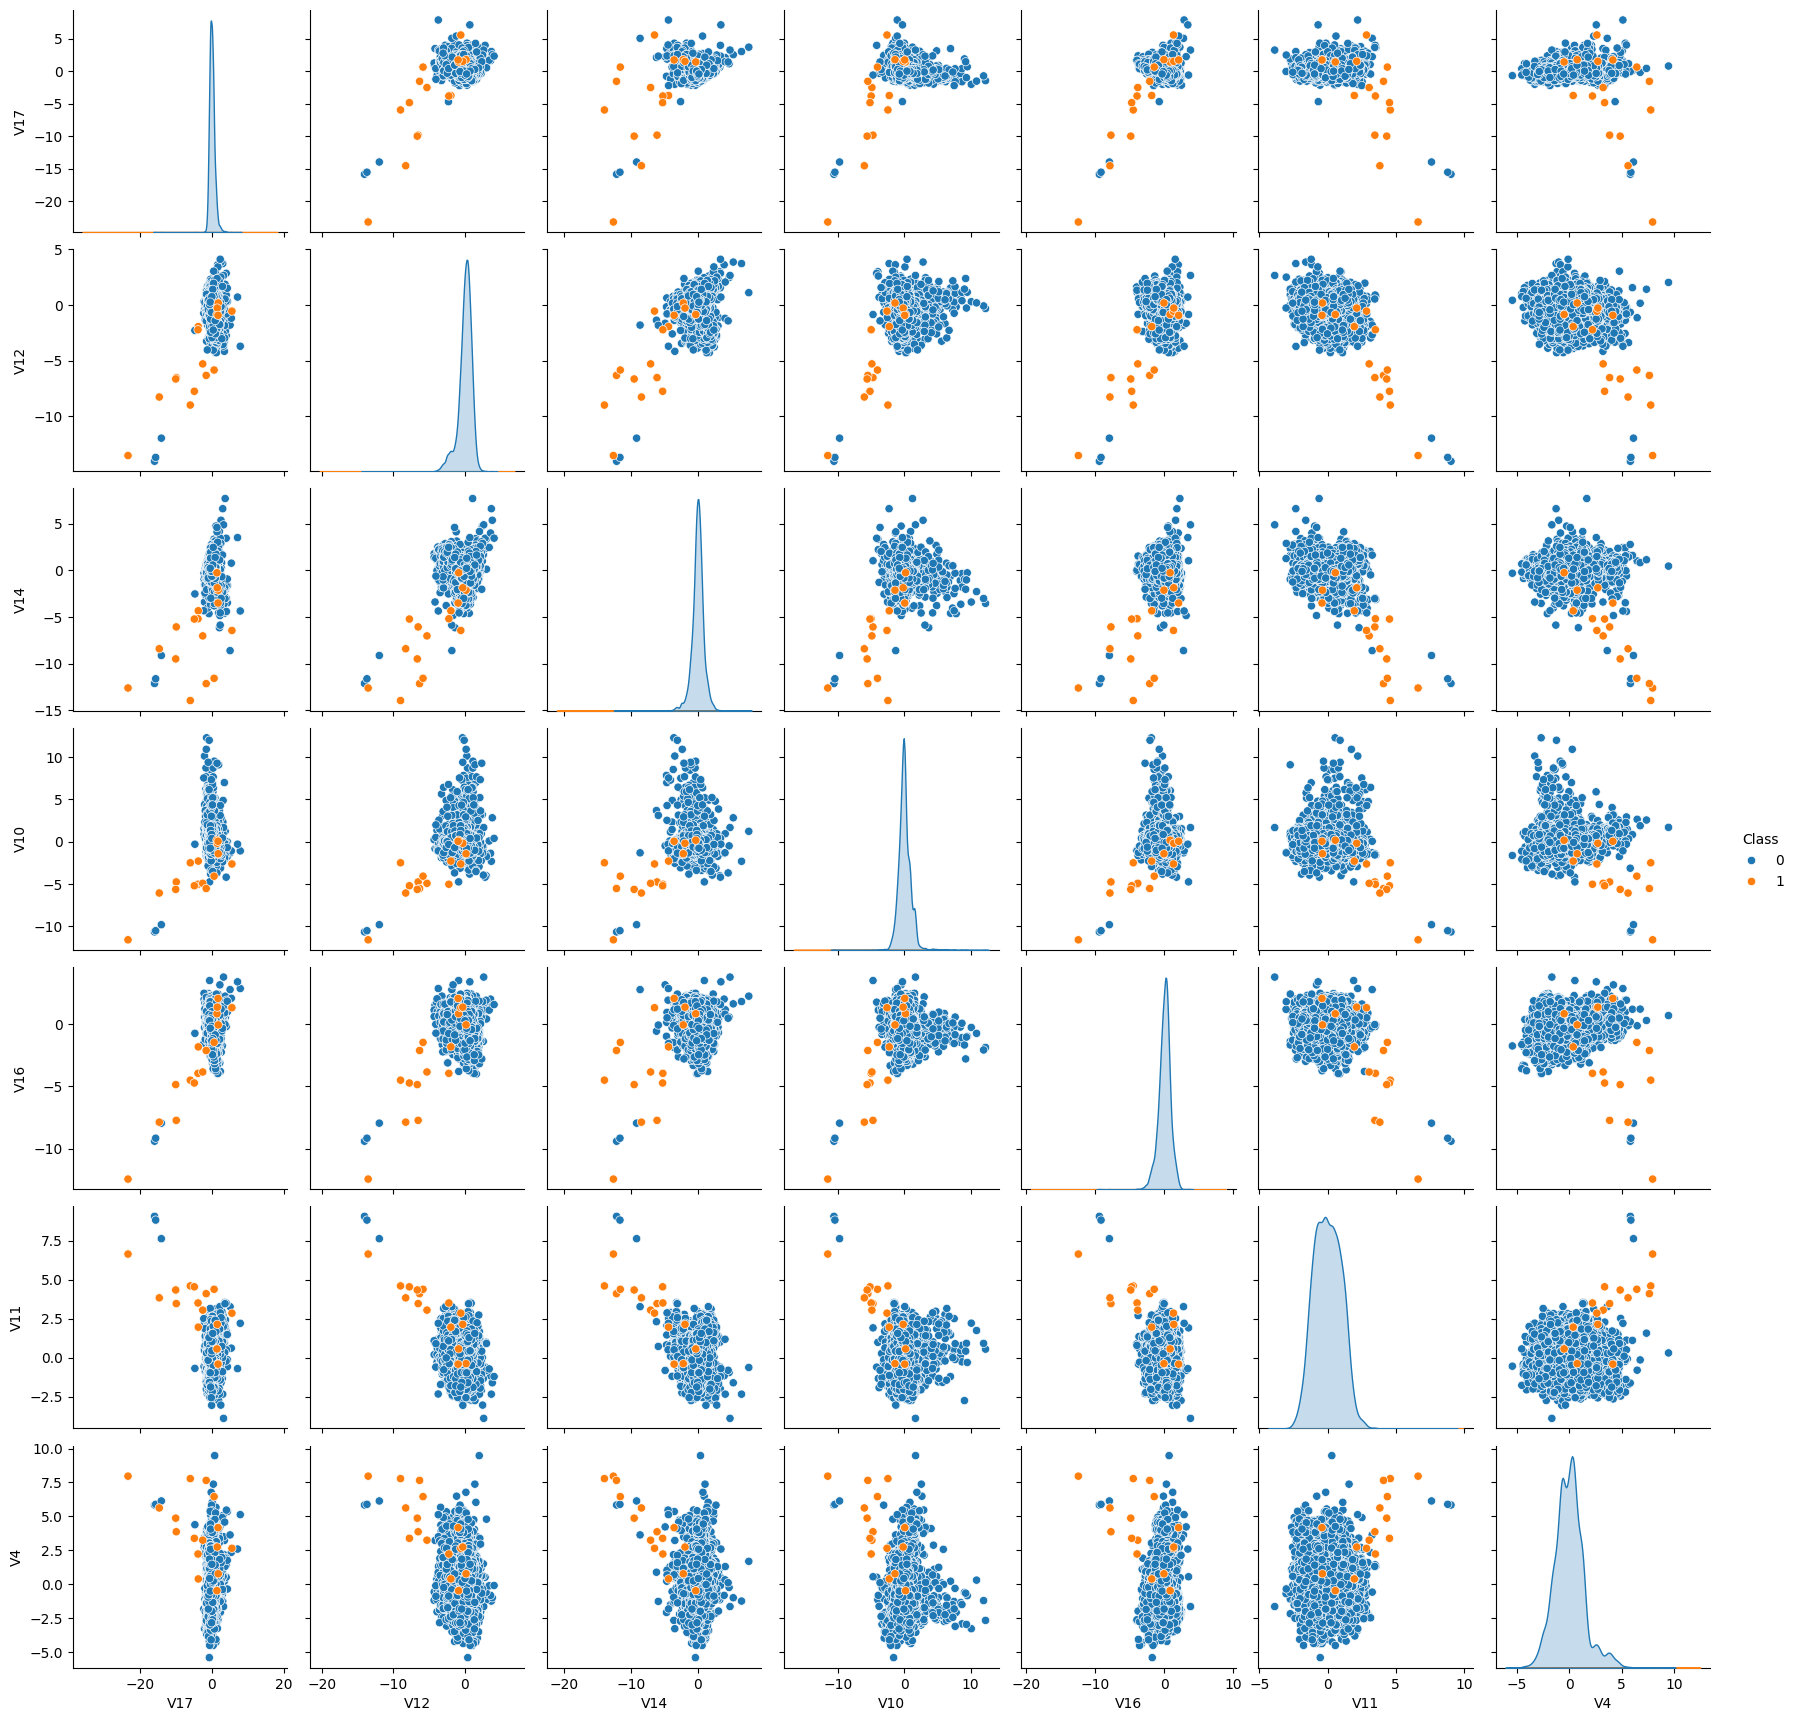

In [44]:
sns.pairplot(df_sampled, hue='Class');

In [317]:
df_cluster = df_sampled.drop('Class', axis=1)

In [46]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler().set_output(transform='pandas')
# df_cluster = scaler.fit_transform(df_cluster)

In [47]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform


def hopkins(X, ratio=0.05):
    """
    Compute the Hopkins statistic for the given dataframe X.
    Hopkins statistic is a measure of the randomness of a data set.
    It is calculated as the ratio of the sum of the distances to the nearest neighbors
    of the uniform random sample to the sum of the distances to the nearest neighbors of
    the original data sample.
    The value of the Hopkins statistic is between 0 and 1, with a value of 0 indicating
    that the data is not random and a value of 1 indicating that the data is completely random.
    The Hopkins statistic is a good measure of the randomness of a data set,
    as it can be used to determine if a data set is random or not.

    Parameters:
    X (pandas.DataFrame): Input dataframe
    ratio (float, optional): Ratio of the uniform random sample to the original data sample. Defaults to 0.05.

    Returns:
    float: Hopkins statistic
    """

    if not isinstance(X, np.ndarray):
        X = X.values  # convert dataframe to a numpy array
    sample_size = int(
        X.shape[0] * ratio
    )  # 0.05 (5%) based on paper by Lawson and Jures

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1])
    )

    # a random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[:, 0]  # distance to the first (nearest) neighbour

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # compute and return hopkins' statistic
    H = u_sum / (u_sum + w_sum)
    return H

In [48]:
result = []
for _ in range(10):
    result.append(hopkins(df_cluster, 0.05))

np.mean(result)

0.9604600480961073

In [49]:
from sklearn.cluster import KMeans

def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

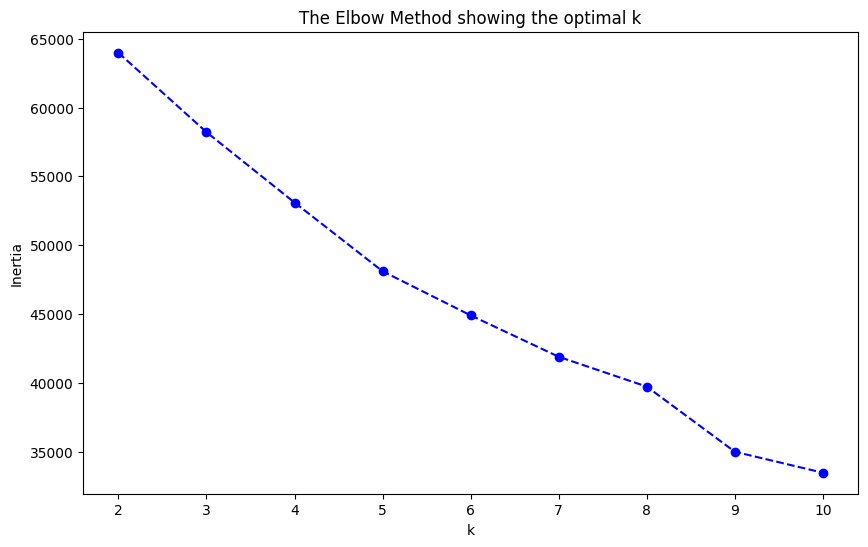

In [50]:
elbow_vis(df_cluster)

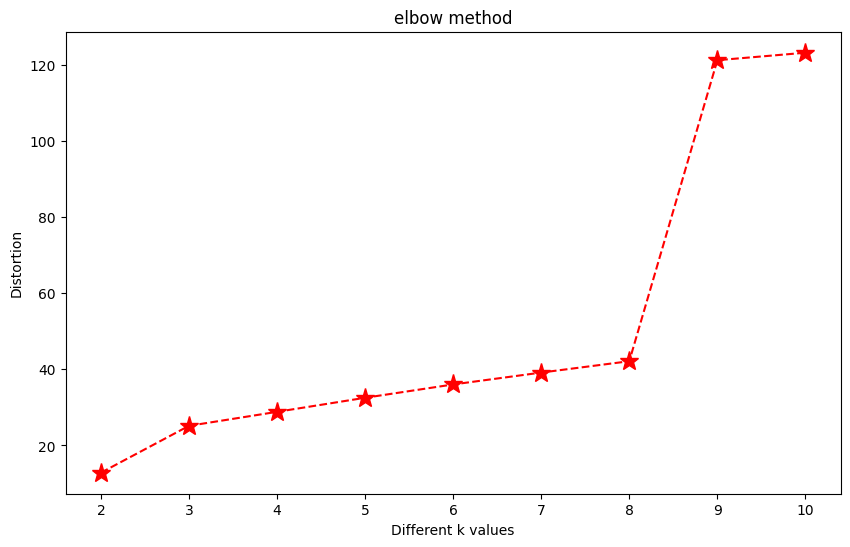

In [51]:
elbow_vis(df_cluster, inertia=False)

In [52]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_cluster)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_cluster, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.159325087205122
For n_clusters=3, the silhouette score is 0.1823739451389551
For n_clusters=4, the silhouette score is 0.1507979498330192
For n_clusters=5, the silhouette score is 0.1720852886319305
For n_clusters=6, the silhouette score is 0.16572983648127998
For n_clusters=7, the silhouette score is 0.17169643383073768
For n_clusters=8, the silhouette score is 0.179917366323644
For n_clusters=9, the silhouette score is 0.18454289997278184
For n_clusters=10, the silhouette score is 0.17297898158951425


In [319]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit_predict(df_cluster)

array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

In [321]:
df_sampled['kmeans_labels'] = kmeans.labels_

In [323]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(df_sampled.Class, df_sampled.kmeans_labels)

-0.00010549175798759298

In [325]:
kmeans2 = KMeans(n_clusters=3, random_state=42)

kmeans2.fit_predict(df_cluster)

array([1, 1, 0, ..., 0, 0, 2], dtype=int32)

In [327]:
df_sampled['kmeans_labels2'] = kmeans2.labels_

In [329]:
clus_pred = df_sampled.groupby("kmeans_labels2").mean()
clus_pred.iloc[:, :-2]

,V17,V12,V14,V10,V16,V11,V4
kmeans_labels2,,,,,,,
0,0.060883,0.263097,0.041690,-0.267169,-0.073113,0.105450,0.482562
1,-0.062879,-0.257360,-0.075732,0.227556,0.061143,-0.099897,-1.300045
2,-0.238728,-0.520289,-0.094118,0.865116,0.327723,-0.234512,3.234793


In [331]:
clus_pred_scaled = MinMaxScaler().set_output(transform="pandas").fit_transform(clus_pred.iloc[:, :-2])
clus_pred_scaled

,V17,V12,V14,V10,V16,V11,V4
kmeans_labels2,,,,,,,
0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.393092
1,0.586924,0.335631,0.135382,0.436926,0.334941,0.395971,0.000000
2,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000


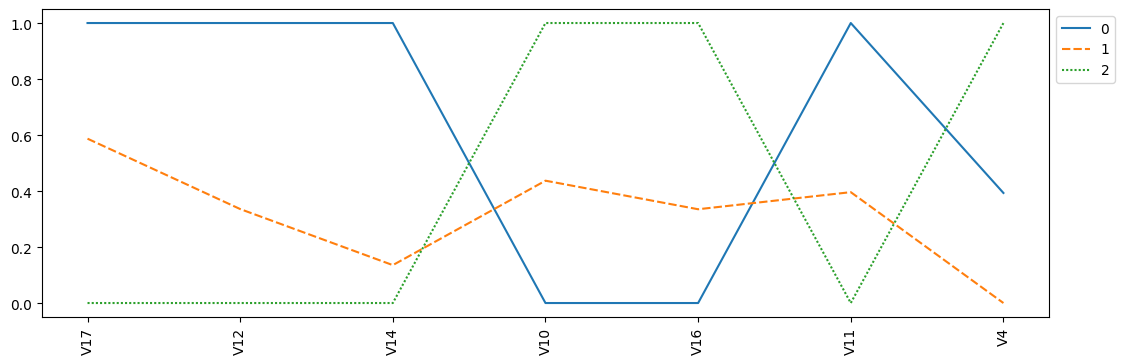

In [333]:
plt.figure(figsize=(13,4))
sns.lineplot(data=clus_pred_scaled.T)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90);

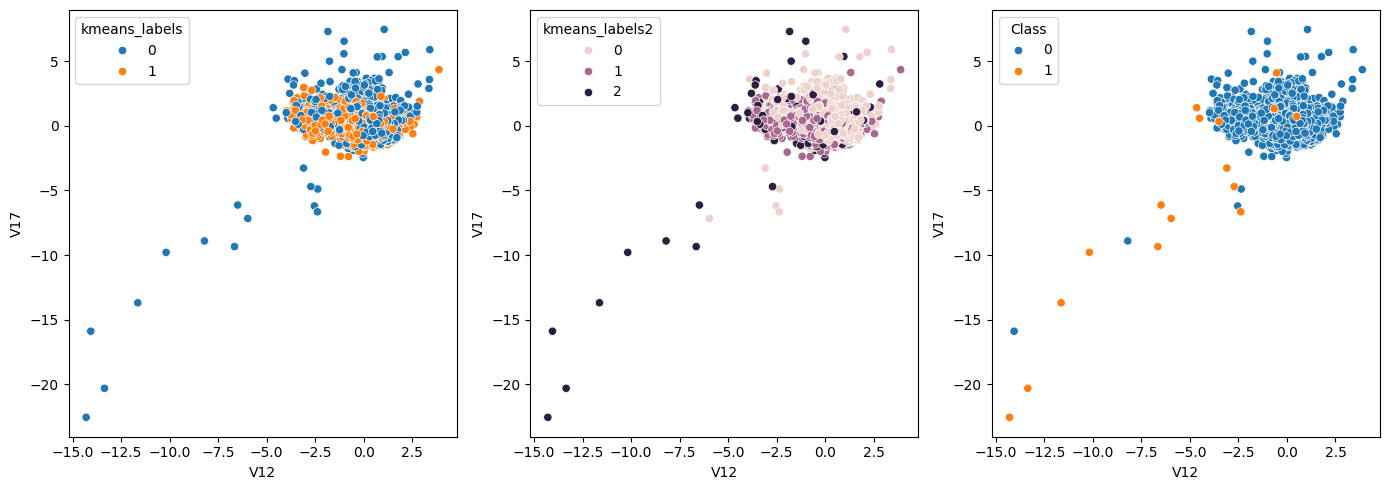

In [339]:
plt.figure(figsize=(14,5))
plt.subplot(131)
sns.scatterplot(data=df_sampled, x='V12', y='V17', hue='kmeans_labels')
plt.subplot(132)
sns.scatterplot(data=df_sampled, x='V12', y='V17', hue='kmeans_labels2')
plt.subplot(133)
sns.scatterplot(data=df_sampled, x='V12', y='V17', hue='Class')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

#### Train - Test Split

In [341]:
X = df.drop('Class', axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify = y, random_state=42)

In [66]:
train_ds = Dataset(X_train, label=y_train)
test_ds = Dataset(X_test, label=y_test)

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_ds, test_ds)
suite_result

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_W2YTY9D0B71T49GPMVYXZXGBI">Train Test Validat…

In [67]:
train_corr = X_train.corrwith(y_train)
test_corr = X_test.corrwith(y_test)

print("Train correlation:\n", train_corr[["V10", "V11", "V14", "V18", "V17"]])
print("\nTest correlation:\n", test_corr[["V10", "V11", "V14", "V18", "V17"]])

Train correlation:
 V10   -0.180243
V11    0.141255
V14   -0.285966
V18   -0.089114
V17   -0.278838
dtype: float64

Test correlation:
 V10   -0.177951
V11    0.139607
V14   -0.284850
V18   -0.085617
V17   -0.283511
dtype: float64


#### Scaling

In [343]:
scaler = StandardScaler().set_output(transform='pandas')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
---


## 4. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

### Logistic Regression

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [345]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

***ii. Model Training***

In [347]:
log_model = LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=-1)
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=-1)

***iii. Prediction and Model Evaluating  and Tuning***

In [349]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[55236  1399]
 [   13    75]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56635
           1       0.05      0.85      0.10        88

    accuracy                           0.98     56723
   macro avg       0.53      0.91      0.54     56723
weighted avg       1.00      0.98      0.99     56723


Train_Set
[[220995   5540]
 [    29    325]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226535
           1       0.06      0.92      0.10       354

    accuracy                           0.98    226889
   macro avg       0.53      0.95      0.55    226889
weighted avg       1.00      0.98      0.99    226889




You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


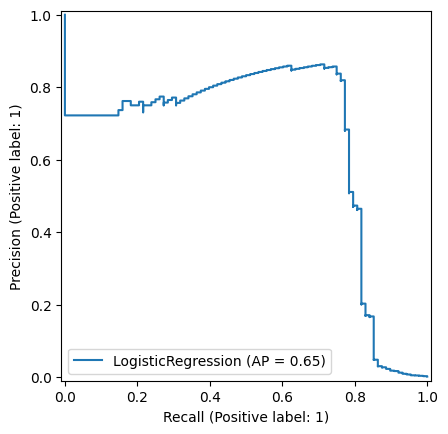

In [351]:
PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test, pos_label=1);

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [84]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, log_model)
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_8PAZ2K8YDY62OTPE4A4NIIO4M">Model Evaluation S…

### Logistic Regression with Unbalanced Data Techniques

***i. Train-Test Split (Again)***

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [359]:
scaler = StandardScaler().set_output(transform='pandas')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***ii. Model Training***

In [377]:
log_model2 = LogisticRegression(class_weight={0:0.5, 1:1000}, C=5, max_iter=10000, n_jobs=-1)
log_model2.fit(X_train, y_train)

LogisticRegression(C=5, class_weight={0: 0.5, 1: 1000}, max_iter=10000,
                   n_jobs=-1)

In [379]:
eval_metric(log_model2, X_train, y_train, X_test, y_test)

Test_Set
[[52263  4372]
 [    8    80]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56635
           1       0.02      0.91      0.04        88

    accuracy                           0.92     56723
   macro avg       0.51      0.92      0.50     56723
weighted avg       1.00      0.92      0.96     56723


Train_Set
[[208768  17767]
 [    13    341]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    226535
           1       0.02      0.96      0.04       354

    accuracy                           0.92    226889
   macro avg       0.51      0.94      0.50    226889
weighted avg       1.00      0.92      0.96    226889



In [381]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
scaler = StandardScaler()
model = LogisticRegression(max_iter=10000, C=5, n_jobs=-1)

steps = [('o', over), ('u', under), ('scaler', scaler), ('log', model)]
pipe_model = Pipeline(steps=steps)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy=0.1)),
                ('u', RandomUnderSampler(sampling_strategy=0.5)),
                ('scaler', StandardScaler()),
                ('log', LogisticRegression(C=5, max_iter=10000, n_jobs=-1))])

***Prediction and Model Evaluating and Tuning***

In [383]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[55947   688]
 [   13    75]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56635
           1       0.10      0.85      0.18        88

    accuracy                           0.99     56723
   macro avg       0.55      0.92      0.59     56723
weighted avg       1.00      0.99      0.99     56723


Train_Set
[[223796   2739]
 [    31    323]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    226535
           1       0.11      0.91      0.19       354

    accuracy                           0.99    226889
   macro avg       0.55      0.95      0.59    226889
weighted avg       1.00      0.99      0.99    226889



***iv.  Plot Precision and Recall Curve***


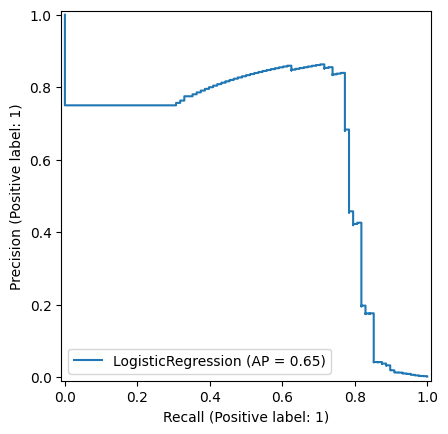

In [385]:
PrecisionRecallDisplay.from_estimator(log_model2, X_test, y_test, pos_label=1)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [387]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, log_model2)
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_LJKCXINK6TNY4OCLOFD6WAGBU">Model Evaluation S…

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

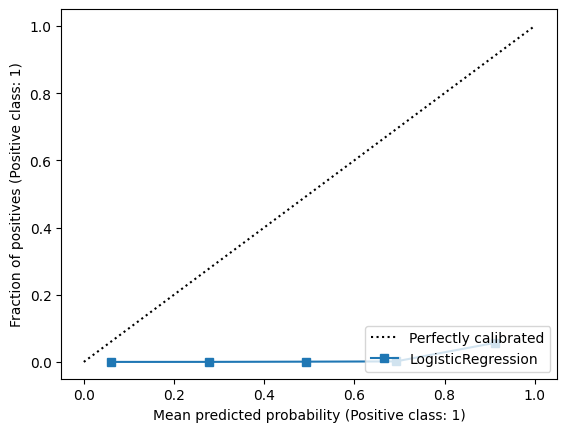

In [389]:
disp = CalibrationDisplay.from_estimator(log_model2, X_train, y_train)
plt.show()

In [391]:
y_pred = pipe_model2.predict_proba(X_train)[:,1]
print('Brier Loss is',brier_score_loss(y_train, y_pred))

Brier Loss is 0.006411258750429453


Brier Loss is 0.000640347830564582


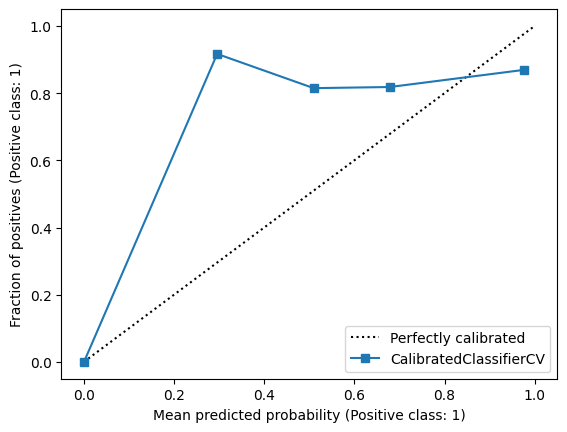

In [393]:
calibrated_pipe_log = CalibratedClassifierCV(log_model2, cv="prefit", method='sigmoid')
calibrated_pipe_log.fit(X_train, y_train)

y_pred = calibrated_pipe_log.predict_proba(X_train)[:,1]
print('Brier Loss is',brier_score_loss(y_train, y_pred))

disp = CalibrationDisplay.from_estimator(calibrated_pipe_log, X_train, y_train)
plt.show()

In [395]:
eval_metric(calibrated_pipe_log, X_train, y_train, X_test, y_test)

Test_Set
[[56625    10]
 [   27    61]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56635
           1       0.86      0.69      0.77        88

    accuracy                           1.00     56723
   macro avg       0.93      0.85      0.88     56723
weighted avg       1.00      1.00      1.00     56723


Train_Set
[[226500     35]
 [   137    217]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226535
           1       0.86      0.61      0.72       354

    accuracy                           1.00    226889
   macro avg       0.93      0.81      0.86    226889
weighted avg       1.00      1.00      1.00    226889



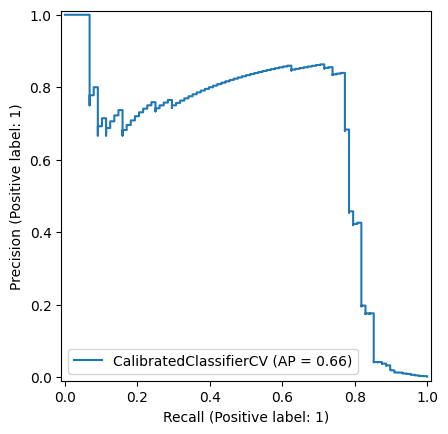

In [397]:
PrecisionRecallDisplay.from_estimator(calibrated_pipe_log, X_test, y_test, pos_label=1)

In [399]:
y_probs = calibrated_pipe_log.predict_proba(X_test)[:, 1]
thresholds = [i/100 for i in range(1, 100)]
best_thresh = max(thresholds, key=lambda t: f1_score(y_test, y_probs > t))

print(f"Best F1-score threshold: {best_thresh}")

Best F1-score threshold: 0.07


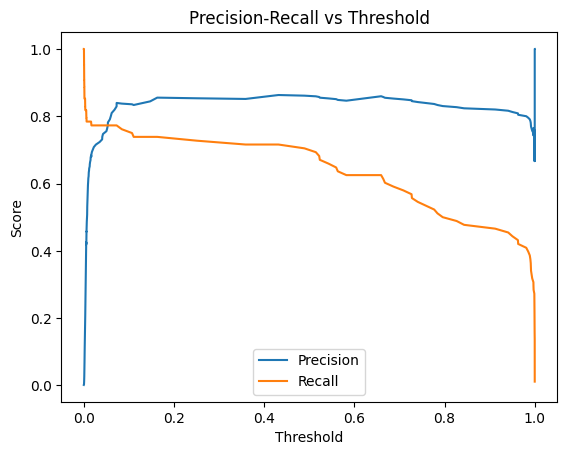

In [401]:
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.show()

In [403]:
f1_score(y_test, y_probs > 0.07)

0.8

In [405]:
precision_score(y_test, y_probs > 0.07)

0.8292682926829268

In [407]:
recall_score(y_test, y_probs > 0.07)

0.7727272727272727

### Random Forest Classifier with Unbalanced Data Techniques
   

***i. Model Training***

In [413]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=4, n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=200,
                       random_state=42)

In [423]:
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=0.2)
scaler = StandardScaler()
model = RandomForestClassifier(random_state=42, max_depth=4, n_estimators=200)

steps = [('o', over), ('u', under), ('scaler', scaler), ('rf', model)]
pipe_rf = Pipeline(steps=steps)

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy=0.05)),
                ('u', RandomUnderSampler(sampling_strategy=0.2)),
                ('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=4, n_estimators=200,
                                        random_state=42))])

***ii. Prediction and Model Evaluating and Tuning***

In [418]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[56395   240]
 [   15    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56635
           1       0.23      0.83      0.36        88

    accuracy                           1.00     56723
   macro avg       0.62      0.91      0.68     56723
weighted avg       1.00      1.00      1.00     56723


Train_Set
[[225581    954]
 [    40    314]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226535
           1       0.25      0.89      0.39       354

    accuracy                           1.00    226889
   macro avg       0.62      0.94      0.69    226889
weighted avg       1.00      1.00      1.00    226889



In [425]:
eval_metric(pipe_rf, X_train, y_train, X_test, y_test)

Test_Set
[[56605    30]
 [   17    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56635
           1       0.70      0.81      0.75        88

    accuracy                           1.00     56723
   macro avg       0.85      0.90      0.88     56723
weighted avg       1.00      1.00      1.00     56723


Train_Set
[[226417    118]
 [    58    296]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226535
           1       0.71      0.84      0.77       354

    accuracy                           1.00    226889
   macro avg       0.86      0.92      0.89    226889
weighted avg       1.00      1.00      1.00    226889



***iii. Plot Precision and Recall Curve***


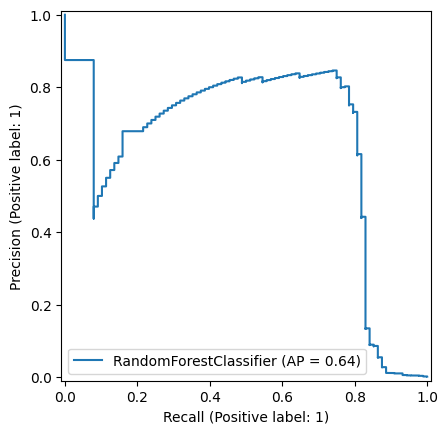

In [427]:
PrecisionRecallDisplay.from_estimator(rf_model, X_test, y_test, pos_label=1);

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [429]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, rf_model)
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_EVRA4KFVUQMSQRQABYD5X6PFY">Model Evaluation S…

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

In [431]:
y_pred = rf_model.predict_proba(X_train)[:,1]
print('Brier Loss is',brier_score_loss(y_train, y_pred))

Brier Loss is 0.014589480090783275


Brier Loss is 0.00048002904154821575


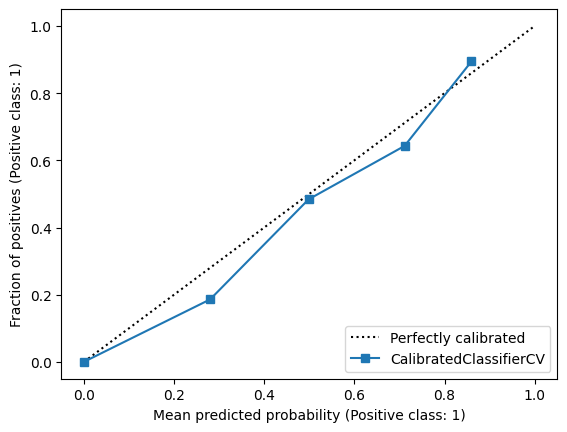

In [433]:
calibrated_rf = CalibratedClassifierCV(rf_model, cv="prefit", method='sigmoid')
calibrated_rf.fit(X_train, y_train)

y_pred = calibrated_rf.predict_proba(X_train)[:,1]
print('Brier Loss is',brier_score_loss(y_train, y_pred))

disp = CalibrationDisplay.from_estimator(calibrated_rf, X_train, y_train)
plt.show()

In [435]:
eval_metric(calibrated_rf, X_train, y_train, X_test, y_test)

Test_Set
[[56621    14]
 [   21    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56635
           1       0.83      0.76      0.79        88

    accuracy                           1.00     56723
   macro avg       0.91      0.88      0.90     56723
weighted avg       1.00      1.00      1.00     56723


Train_Set
[[226484     51]
 [    73    281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226535
           1       0.85      0.79      0.82       354

    accuracy                           1.00    226889
   macro avg       0.92      0.90      0.91    226889
weighted avg       1.00      1.00      1.00    226889



In [437]:
y_probs = calibrated_rf.predict_proba(X_test)[:, 1]
thresholds = [i/100 for i in range(1, 100)]
best_thresh = max(thresholds, key=lambda t: f1_score(y_test, y_probs > t))

print(f"Best F1-score threshold: {best_thresh}")

Best F1-score threshold: 0.57


In [439]:
f1_score(y_test, y_probs > 0.57)

0.7951807228915663

In [441]:
precision_score(y_test, y_probs > 0.57)

0.8461538461538461

In [443]:
recall_score(y_test, y_probs > 0.57)

0.75

### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

In [535]:
xgb_model2 = XGBClassifier(
    random_state=42,
    max_depth=2,
    n_estimators=600,
    learning_rate=0.2,
    subsample=0.6,
    min_child_weight=10,
    gamma=0.4,
    colsample_bytree=0.6,
    reg_lambda=10,
    reg_alpha=5
)

xgb_model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [467]:
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=0.2)
model = XGBClassifier(random_state=42, max_depth=2, n_estimators=200, colsample_bytree=0.7, gamma=0.2, learning_rate=0.7,
                     min_child_weight=5, subsample=0.6)

steps = [('o', over), ('u', under), ('xgb', model)]
pipe_xgb = Pipeline(steps=steps)
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy=0.05)),
                ('u', RandomUnderSampler(sampling_strategy=0.2)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.7, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.7,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

***ii. Prediction and Model Evaluating and Tuning***

In [537]:
eval_metric(xgb_model2, X_train, y_train, X_test, y_test)

Test_Set
[[56630     5]
 [   22    66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56635
           1       0.93      0.75      0.83        88

    accuracy                           1.00     56723
   macro avg       0.96      0.87      0.91     56723
weighted avg       1.00      1.00      1.00     56723


Train_Set
[[226526      9]
 [    69    285]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226535
           1       0.97      0.81      0.88       354

    accuracy                           1.00    226889
   macro avg       0.98      0.90      0.94    226889
weighted avg       1.00      1.00      1.00    226889



In [469]:
eval_metric(pipe_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[56549    86]
 [   18    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56635
           1       0.45      0.80      0.57        88

    accuracy                           1.00     56723
   macro avg       0.72      0.90      0.79     56723
weighted avg       1.00      1.00      1.00     56723


Train_Set
[[226228    307]
 [     0    354]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226535
           1       0.54      1.00      0.70       354

    accuracy                           1.00    226889
   macro avg       0.77      1.00      0.85    226889
weighted avg       1.00      1.00      1.00    226889



***iii. Plot Precision and Recall Curve***


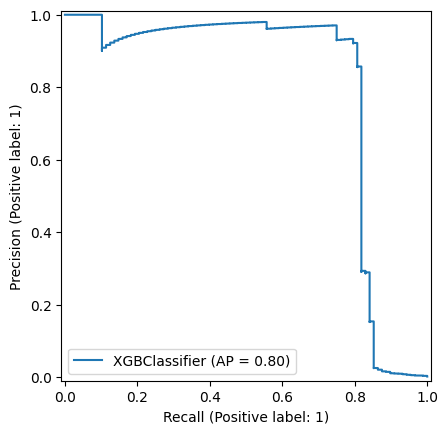

In [539]:
PrecisionRecallDisplay.from_estimator(xgb_model2, X_test, y_test, pos_label=1);

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [541]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb_model2)
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_IUBBT8619Z87W4EJLICSGKLZ3">Model Evaluation S…

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

Brier Loss is 0.0003189154281859646


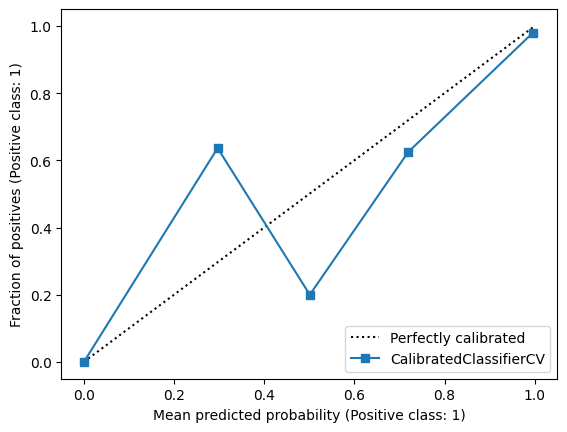

In [543]:
calibrated_xgb = CalibratedClassifierCV(xgb_model2, cv="prefit", method='sigmoid')
calibrated_xgb.fit(X_train, y_train)

y_pred = calibrated_xgb.predict_proba(X_train)[:,1]
print('Brier Loss is',brier_score_loss(y_train, y_pred))

disp = CalibrationDisplay.from_estimator(calibrated_xgb, X_train, y_train)
plt.show()

In [545]:
eval_metric(calibrated_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[56630     5]
 [   22    66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56635
           1       0.93      0.75      0.83        88

    accuracy                           1.00     56723
   macro avg       0.96      0.87      0.91     56723
weighted avg       1.00      1.00      1.00     56723


Train_Set
[[226524     11]
 [    68    286]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226535
           1       0.96      0.81      0.88       354

    accuracy                           1.00    226889
   macro avg       0.98      0.90      0.94    226889
weighted avg       1.00      1.00      1.00    226889



In [549]:
y_probs = calibrated_xgb.predict_proba(X_test)[:, 1]
thresholds = [i/100 for i in range(1, 100)]
best_thresh = max(thresholds, key=lambda t: f1_score(y_test, y_probs > t))

print(f"Best F1-score threshold: {best_thresh}")

Best F1-score threshold: 0.04


In [551]:
f1_score(y_test, y_probs > 0.04)

0.8588957055214724

In [553]:
precision_score(y_test, y_probs > 0.04)

0.9333333333333333

In [555]:
recall_score(y_test, y_probs > 0.04)

0.7954545454545454

### Feature Importance

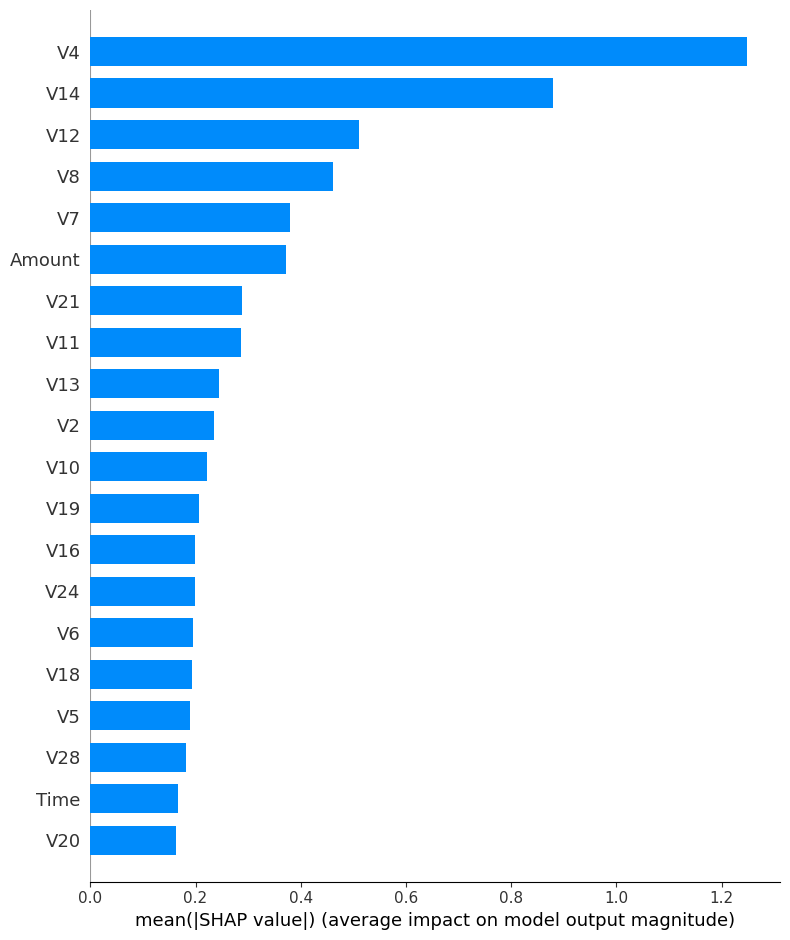

In [557]:
explainer = shap.TreeExplainer(xgb_model2)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar', max_display=20)

### What to do next?

- With feature selection the dataset will be more compact and with less noise.
- Hyperparameter tuning via GridSearchCV or RandomSearchCV will further improve scores.
- XGBoost model may be a good fit for our purpose with extra tweaks.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___